### Imports

In [148]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, mannwhitneyu, shapiro, ttest_ind
from scipy import stats
from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms

import Toolbox_ML as Tools_ML

### Data

In [2]:
iris = pd.read_csv("./data/iris.csv")
brujas = pd.read_csv("./data/trials.csv")
drogas = pd.read_csv("./data/drug200.csv")
consumo_alcohol = pd.read_csv("./data/drinks.csv")
pelis = pd.read_csv("./data/imdbTop250.csv")
desperdicio_comida = pd.read_csv("./data/brooklyn.csv")
precio_pizza = pd.read_csv("./data/Pizza-Price.csv")
personalidad = pd.read_csv("./data/psyc.csv")
estrellas = pd.read_csv("./data/Stars.csv")
titanic = pd.read_csv("./data/titanic.csv")
boston = pd.read_csv("./data/obligatoria_hard.csv", sep = "|")

## Toolbox_ML

### Función | describe_df

In [5]:
def describe_df(df):
    tipos = df.dtypes
    porcentaje_faltante = (df.isnull().mean() * 100).round(2)
    valores_unicos = df.nunique()
    porcentaje_cardinalidad = ((valores_unicos / len(df)) * 100).round(2)
    resultado_describe = pd.DataFrame({
        "Tipos" : tipos,
        "% Faltante" : porcentaje_faltante,
        "Valores Únicos" : valores_unicos,
        "% Cardinalidad" : porcentaje_cardinalidad
    })
    return resultado_describe.T

In [6]:
describe_df(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
Tipos,float64,float64,float64,float64,object
% Faltante,0.0,0.0,0.0,0.0,0.0
Valores Únicos,35,23,43,22,3
% Cardinalidad,23.33,15.33,28.67,14.67,2.0


In [67]:
describe_df(desperdicio_comida)

,id,date_collected,retailer_type,retailer_detail,food_type,food_detail,label_type,label_language,label_date,approximate_dollar_value,image_id,collection_lat,collection_long,label_explanation
Tipos,object,object,object,object,object,object,object,object,object,float64,object,float64,float64,object
% Faltante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.82,0.58,0.0,0.0,0.0,0.0,99.42
Valores Únicos,171,9,6,5,4,84,2,17,62,72,169,7,7,1
% Cardinalidad,100.0,5.26,3.51,2.92,2.34,49.12,1.17,9.94,36.26,42.11,98.83,4.09,4.09,0.58


In [9]:
describe_df(brujas)

,year,decade,century,tried,deaths,city,gadm.adm2,gadm.adm1,gadm.adm0,lon,lat,record.source
Tipos,float64,int64,int64,int64,float64,object,object,object,object,float64,float64,object
% Faltante,8.51,0.0,0.0,0.0,34.97,47.65,9.57,1.45,0.0,53.04,53.04,0.0
Valores Únicos,430,53,6,111,74,906,365,113,19,778,778,38
% Cardinalidad,3.93,0.48,0.05,1.01,0.68,8.28,3.34,1.03,0.17,7.11,7.11,0.35


In [10]:
describe_df(drogas)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Tipos,int64,object,object,object,float64,object
% Faltante,0.0,0.0,0.0,0.0,0.0,0.0
Valores Únicos,57,2,3,2,198,5
% Cardinalidad,28.5,1.0,1.5,1.0,99.0,2.5


In [11]:
describe_df(consumo_alcohol)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
Tipos,object,int64,int64,int64,float64
% Faltante,0.0,0.0,0.0,0.0,0.0
Valores Únicos,193,130,109,79,90
% Cardinalidad,100.0,67.36,56.48,40.93,46.63


In [12]:
describe_df(pelis)

,Ranking,IMDByear,IMDBlink,Title,Date,RunTime,Genre,Rating,Score,Votes,Gross,Director,Cast1,Cast2,Cast3,Cast4
Tipos,int64,int64,object,object,int64,int64,object,float64,float64,int64,float64,object,object,object,object,object
% Faltante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.71,0.0,12.45,0.0,0.0,0.0,0.12,0.12
Valores Únicos,250,26,744,742,101,139,200,31,40,744,585,437,486,633,667,699
% Cardinalidad,3.85,0.4,11.45,11.42,1.55,2.14,3.08,0.48,0.62,11.45,9.0,6.72,7.48,9.74,10.26,10.75


In [13]:
describe_df(precio_pizza)

,Restaurant,Extra Cheeze,Extra Mushroom,Size by Inch,Extra Spicy,Price
Tipos,object,object,object,int64,object,int64
% Faltante,0.0,0.0,0.0,0.0,0.0,0.0
Valores Únicos,20,2,2,4,2,10
% Cardinalidad,100.0,10.0,10.0,20.0,10.0,50.0


In [14]:
describe_df(personalidad)

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
Tipos,object,int64,int64,int64,int64,int64,int64,object
% Faltante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores Únicos,2,13,8,9,9,8,8,5
% Cardinalidad,0.63,4.13,2.54,2.86,2.86,2.54,2.54,1.59


In [15]:
describe_df(estrellas)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
Tipos,int64,float64,float64,float64,object,object,int64
% Faltante,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores Únicos,228,208,216,228,17,7,6
% Cardinalidad,95.0,86.67,90.0,95.0,7.08,2.92,2.5


### Función | tipifica_variables

In [16]:
def tipifica_variables(df, umbral_categoria, umbral_continua):
    lista_tipifica = []
    for columna in df.columns:
        cardinalidad = len(df[columna].unique())
        if cardinalidad == 2:
            lista_tipifica.append("Binaria")
        elif cardinalidad < umbral_categoria:
            lista_tipifica.append("Categórica")
        else:
            porcentaje_cardinalidad = (cardinalidad / len(df)) * 100
            if porcentaje_cardinalidad >= umbral_continua:
                lista_tipifica.append("Numérica Continua")
            else:
                lista_tipifica.append("Numérica Discreta")
    resultado_tipifica = pd.DataFrame({"nombre_variable" : df.columns.tolist(), "tipo_sugerido" : lista_tipifica})
    return resultado_tipifica

In [17]:
tipifica_variables(iris, umbral_categoria = 5, umbral_continua = 10)

,nombre_variable,tipo_sugerido
0,sepal_length,Numérica Continua
1,sepal_width,Numérica Continua
2,petal_length,Numérica Continua
3,petal_width,Numérica Continua
4,species,Categórica


In [33]:
tipifica_variables(brujas, umbral_categoria = 20, umbral_continua = 30)
# city sale como numérica discruta... sería correcto?

,nombre_variable,tipo_sugerido
0,year,Numérica Discreta
1,decade,Numérica Discreta
2,century,Categórica
3,tried,Numérica Discreta
4,deaths,Numérica Discreta
5,city,Numérica Discreta
6,gadm.adm2,Numérica Discreta
7,gadm.adm1,Numérica Discreta
8,gadm.adm0,Categórica
9,lon,Numérica Discreta


In [34]:
tipifica_variables(drogas, umbral_categoria = 5, umbral_continua = 10)

,nombre_variable,tipo_sugerido
0,Age,Numérica Continua
1,Sex,Binaria
2,BP,Categórica
3,Cholesterol,Binaria
4,Na_to_K,Numérica Continua
5,Drug,Numérica Discreta


In [35]:
tipifica_variables(consumo_alcohol, umbral_categoria = 10, umbral_continua = 20)
# country sale como numérica discruta... sería correcto? Dará error si se pide una media, por ej...

,nombre_variable,tipo_sugerido
0,country,Numérica Continua
1,beer_servings,Numérica Continua
2,spirit_servings,Numérica Continua
3,wine_servings,Numérica Continua
4,total_litres_of_pure_alcohol,Numérica Continua


In [43]:
tipifica_variables(pelis, umbral_categoria = 50, umbral_continua = 60)
# Escorrecto que genre califique como numérica? Y que rating y score sean categóricas? Cómo procesará
# numéricamente las categorías que son strings?

,nombre_variable,tipo_sugerido
0,Ranking,Numérica Discreta
1,IMDByear,Categórica
2,IMDBlink,Numérica Discreta
3,Title,Numérica Discreta
4,Date,Numérica Discreta
5,RunTime,Numérica Discreta
6,Genre,Numérica Discreta
7,Rating,Categórica
8,Score,Categórica
9,Votes,Numérica Discreta


In [44]:
tipifica_variables(desperdicio_comida, umbral_categoria = 5, umbral_continua = 10)
# las fechas las debería reconocer como tak?

,nombre_variable,tipo_sugerido
0,id,Numérica Continua
1,date_collected,Numérica Discreta
2,retailer_type,Numérica Discreta
3,retailer_detail,Numérica Discreta
4,food_type,Categórica
5,food_detail,Numérica Continua
6,label_type,Binaria
7,label_language,Numérica Continua
8,label_date,Numérica Continua
9,approximate_dollar_value,Numérica Continua


In [45]:
tipifica_variables(precio_pizza, umbral_categoria = 5, umbral_continua = 10)
# Toma la letra como numérica. Luego no la podrá procesar como número

,nombre_variable,tipo_sugerido
0,Restaurant,Numérica Continua
1,Extra Cheeze,Binaria
2,Extra Mushroom,Binaria
3,Size by Inch,Categórica
4,Extra Spicy,Binaria
5,Price,Numérica Continua


In [47]:
tipifica_variables(personalidad, umbral_categoria = 6, umbral_continua = 10)

,nombre_variable,tipo_sugerido
0,gender,Binaria
1,age,Numérica Discreta
2,openness,Numérica Discreta
3,neuroticism,Numérica Discreta
4,conscientiousness,Numérica Discreta
5,agreeableness,Numérica Discreta
6,extraversion,Numérica Discreta
7,Personality,Categórica


In [52]:
tipifica_variables(estrellas, umbral_categoria = 19, umbral_continua = 30)

,nombre_variable,tipo_sugerido
0,Temperature,Numérica Continua
1,L,Numérica Continua
2,R,Numérica Continua
3,A_M,Numérica Continua
4,Color,Categórica
5,Spectral_Class,Categórica
6,Type,Categórica


### Función | get_features_num_regression

In [53]:
def get_features_num_regression(df, target_col, umbral_corr, pvalue = None):
    if not isinstance(df, pd.DataFrame):
        print("Error: No has introducido un DataFrame válido de pandas.")
        return None
    if target_col not in df.columns:
        print(f"Error: La columna {target_col} no está en el DataFrame.")
        return None
    if not np.issubdtype(df[target_col].dtype, np.number):
        print(f"Error: La columna {target_col} no es numérica.")
        return None    
    if not 0 <= umbral_corr <= 1:
        print("Error: El umbral_corr debe estar entre 0 y 1.")
        return None
    if pvalue is not None:
        if not 0 <= pvalue <= 1:
            print("Error: El pvalue debe estar entre 0 y 1.")
            return None
        
    var_tip = tipifica_variables(df, 10, 20)
    col_num = var_tip[(var_tip["tipo_sugerido"] == "Numérica Continua") | (var_tip["tipo_sugerido"] == "Numérica Discreta")]["nombre_variable"].tolist()

    correlaciones = df[col_num].corr()[target_col]
    columnas_filtradas = correlaciones[abs(correlaciones) > umbral_corr].index.tolist()
    if target_col in columnas_filtradas:
        columnas_filtradas.remove(target_col)
    
    if pvalue is not None:
        columnas_finales = []
        for col in columnas_filtradas:
            p_value_especifico = pearsonr(df[col], df[target_col])[1]
            if pvalue < (1 - p_value_especifico):
                columnas_finales.append(col)
        columnas_filtradas = columnas_finales.copy()

    return columnas_filtradas

In [54]:
get_features_num_regression(iris, "sepal_length", 0.05)

['petal_length', 'petal_width']

In [55]:
get_features_num_regression(brujas, "decade", 0.2)
# Debería haber salido la comprobación de que fuera numérica? Será que solo comprueba la columna 
# target pero no las demás?

ValueError: could not convert string to float: 'Isny im Allgau'

In [72]:
get_features_num_regression(drogas, "Na_to_K", 1)
# Devuelve lista vacía

[]

In [106]:
get_features_num_regression(consumo_alcohol,"total_litres_of_pure_alcohol", 1, 0.036)
# Error al intentar tratar como numérica una categórica de string

ValueError: could not convert string to float: 'Afghanistan'

In [61]:
get_features_num_regression(pelis, "Votes", 0.3)
# El problema no es la columna target sino las otras...

ValueError: could not convert string to float: '/title/tt0076759/'

In [63]:
get_features_num_regression(precio_pizza, "Price", 2, 0.05)

Error: El umbral_corr debe estar entre 0 y 1.


In [64]:
get_features_num_regression(personalidad, "Edad", 0.01, 1)

Error: La columna Edad no está en el DataFrame.


In [65]:
get_features_num_regression(estrellas, "Temperature", .5, 2)

Error: El pvalue debe estar entre 0 y 1.


### Función | plot_features_num_regression

In [73]:
def plot_features_num_regression(df, target_col = "", columns = [], umbral_corr = 0, pvalue = None):
    if not columns:
        columns = [col for col in df.columns if np.issubdtype(df[col].dtype, np.number)]
    else:
        for col in columns:
            if col not in df.columns:
                print(f"Error: La columna {col} no está en el DataFrame.")
                return None    
    columnas_filtradas = get_features_num_regression(df, target_col, umbral_corr, pvalue)
    columnas_agrupadas = [columnas_filtradas[i:i+4] for i in range(0, len(columnas_filtradas), 4)]
    for group in columnas_agrupadas:
        sns.pairplot(df[[target_col] + group])
        plt.show()
    return columnas_filtradas

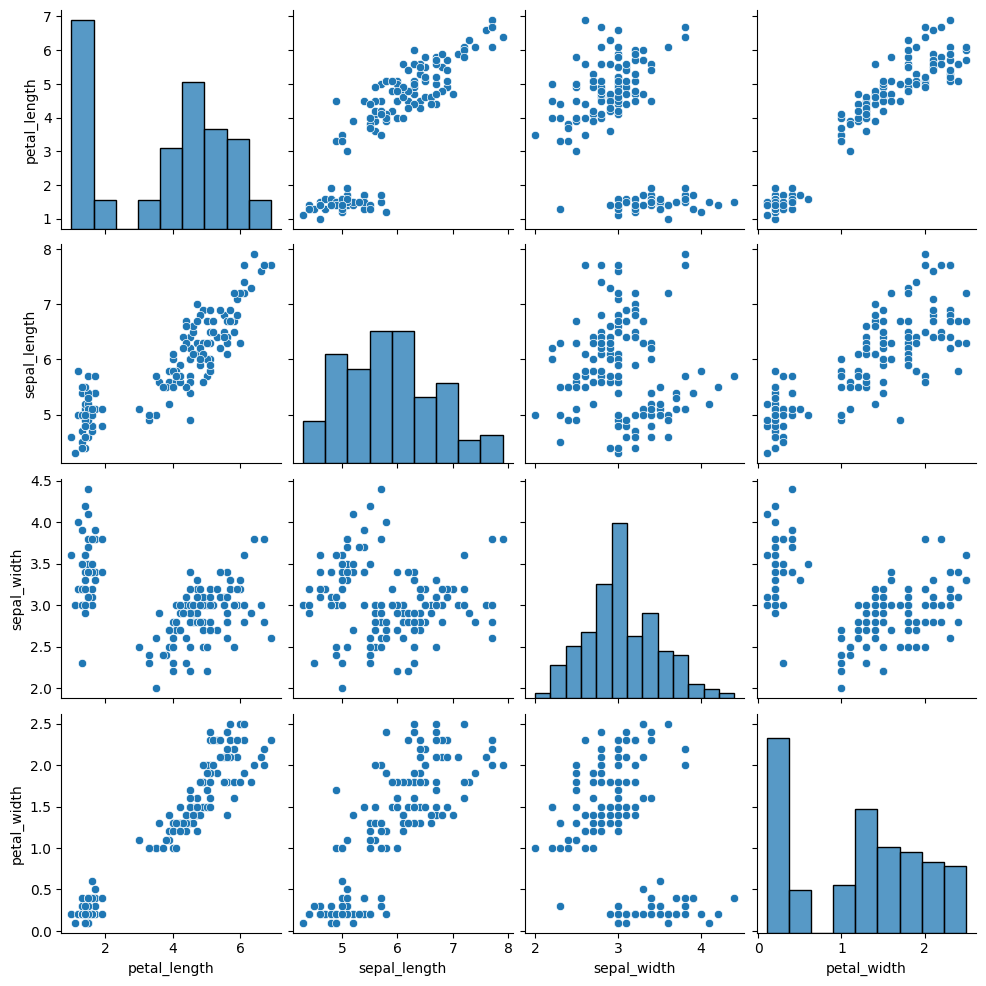

['sepal_length', 'sepal_width', 'petal_width']

In [74]:
plot_features_num_regression(iris, "petal_length", ["petal_width", "species"], umbral_corr = 0.4, )

In [78]:
plot_features_num_regression(brujas, "city", umbral_corr =  1, pvalue=0.2)
# Sale bien el aviso de que no es numñerica, pero se genera otro error

Error: La columna city no es numérica.


TypeError: object of type 'NoneType' has no len()

In [83]:
plot_features_num_regression(drogas, "Cholesterol", ["Age", "Sex"])
# Mismo error que antes. Detecta bien que no es numérica la target, pero si la cambio por numérica 
# desaparece el error (es decir, aunque detecta el error y avisa, igual de TypeError si el target no
# es numérica)

Error: La columna Cholesterol no es numérica.


TypeError: object of type 'NoneType' has no len()

In [86]:
plot_features_num_regression(consumo_alcohol, "", ["beer_servings", "spirit_servings", "wine_servings"], umbral_corr = 0.4, pvalue=1.3)
# Mismo error que antes, tanto si la columna target no es numérica como si está en blanco

Error: La columna  no está en el DataFrame.


TypeError: object of type 'NoneType' has no len()

In [87]:
plot_features_num_regression(pelis, "Gross", ["Cast1", "Cast2", "Cast3", "Cast4"])
# Error por una columna que ni es target ni está en la lista

ValueError: could not convert string to float: '/title/tt0076759/'

In [92]:
plot_features_num_regression(precio_pizza, " Size by Inch", ["Restaurant", "Extra Cheeze", "Extra Mushroom"], umbral_corr = 0.4, pvalue=.9)
# Da error cuando una columna de la lista ni es numérica

ValueError: could not convert string to float: 'A'

In [95]:
plot_features_num_regression(personalidad, "conscientiousness", ["age",	"openness",	"neuroticism"], umbral_corr = 0.01, pvalue= 0.074)
# No reconoce la columna??

KeyError: 'conscientiousness'

In [94]:
personalidad.columns

Index(['gender', 'age', 'openness', 'neuroticism', 'conscientiousness',
       'agreeableness', 'extraversion', 'Personality'],
      dtype='object')

In [96]:
plot_features_num_regression(estrellas, "L", ["A_M"], umbral_corr = 0.4)
# La columna Color que no es numérica no la puede gestionar.

ValueError: could not convert string to float: 'Red'

### Función | get_features_num_regression v2

In [97]:
def get_features_cat_regression_v2(df, target_col, pvalue=0.05):
    if not (isinstance(df, pd.DataFrame)):
        print("Error: El parámetro df", df, " no es un DataFrame.")
        return None    
    if type(pvalue) != float and type(pvalue) != int:
        print("Error: El parámetro pvalue", pvalue, " no es un número.")
        return None
    elif  not (0 <= pvalue <= 1):
        print("Error: El parametro pvalue", pvalue, " está fuera del rango [0,1].")
        return None        
    if  not (target_col in df.columns):
        print("Error: El parámetro target ", target_col , " no es una columna del Dataframe.")
        return None        
    var_tip = tipifica_variables(df, 5, 10)
    if not (var_tip.loc[var_tip["nombre_variable"] == target_col, "tipo_sugerido"].iloc[0] == "Numérica Continua"):
        print("Error: El parametro target ", target_col , " no es una columna numérica continua del dataframe.")
        return None
    col_cat = var_tip[(var_tip["tipo_sugerido"] == "Categórica") | (var_tip["tipo_sugerido"] == "Binaria")]["nombre_variable"].tolist()
    if col_cat == 0:
        return None         
    col_selec = []    
    for valor in col_cat:
        grupos = df[valor].unique() 
        if len(grupos) == 2:
            grupo_a = df.loc[df[valor] == grupos[0]][target_col]
            grupo_b = df.loc[df[valor] == grupos[1]][target_col]
            _, p = shapiro(grupo_a) 
            _, p2 = shapiro(grupo_b)
            if p < 0.05 and p2 < 0.05:
                stat, p = ttest_ind(grupo_a, grupo_b) 
            else:
                u_stat, p_val = mannwhitneyu(grupo_a, grupo_b)  
        else:
            v_cat = [df[df[valor] == grupo][target_col] for grupo in grupos] 
            f_val, p_val = stats.f_oneway(*v_cat) 
        if p_val < pvalue:
            col_selec.append(valor)        
    return col_selec

In [98]:
get_features_num_regression(iris, "sepal_length", 0.05)

['sepal_width', 'petal_length', 'petal_width']

In [99]:
get_features_num_regression(brujas, "decade", 0.2)
# Mismo error que V1

ValueError: could not convert string to float: 'Isny im Allgau'

In [100]:
get_features_num_regression(drogas, "Na_to_K", 1)

[]

In [107]:
get_features_num_regression(consumo_alcohol,"total_litres_of_pure_alcohol", 1, 0.036)
# Mismo error que v1

ValueError: could not convert string to float: 'Afghanistan'

In [101]:
get_features_num_regression(pelis, "Votes", 0.3)
# mismo errro que v1

ValueError: could not convert string to float: '/title/tt0076759/'

In [102]:
get_features_num_regression(precio_pizza, "Price", 2, 0.05)

Error: El umbral_corr debe estar entre 0 y 1.


In [103]:
get_features_num_regression(personalidad, "Edad", 0.01, 1)

Error: La columna Edad no está en el DataFrame.


In [104]:
get_features_num_regression(estrellas, "Temperature", .5, 2)

Error: El pvalue debe estar entre 0 y 1.


### Función | get_features_cat_regression

### get_features_cat Versión "seguir el enunciado"

In [108]:
def get_features_cat_regression(df, target_col, pvalue=0.05):
    if not (isinstance(df, pd.DataFrame)):
        print("Error: El parámetro df", df, " no es un DataFrame.")
        return None
    if type(pvalue) != float and type(pvalue) != int:
        print("Error: El parámetro pvalue", pvalue, " no es un número.")
        return None
    elif  not (0 <= pvalue <= 1):
        print("Error: El parametro pvalue", pvalue, " está fuera del rango [0,1].")
        return None
    if  not (target_col in df.columns):
        print("Error: El parámetro target ", target_col , " no es una columna del Dataframe.")
        return None        
    var_tip = tipifica_variables(df, 5, 10)
    if not (var_tip.loc[var_tip["nombre_variable"] == target_col, "tipo_sugerido"].iloc[0] == "Numérica Continua"):
        print("Error: El parametro target ", target_col , " no es una columna numérica continua del dataframe.")
        return None
    col_cat = var_tip[(var_tip["tipo_sugerido"] == "Categórica") | (var_tip["tipo_sugerido"] == "Binaria")]["nombre_variable"].tolist()
    if col_cat == 0:
        return None         
    col_selec = []
    for valor in col_cat:
        grupos = df[valor].unique()  
        if len(grupos) == 2:
            grupo_a = df.loc[df[valor] == grupos[0]][target_col]
            grupo_b = df.loc[df[valor] == grupos[1]][target_col]
            u_stat, p_val = mannwhitneyu(grupo_a, grupo_b)  
        else:
            v_cat = [df[df[valor] == grupo][target_col] for grupo in grupos] 
            f_val, p_val = stats.f_oneway(*v_cat) 
        if p_val < pvalue:
            col_selec.append(valor)        
    return col_selec

In [110]:
get_features_cat_regression(iris, "sepal_width")

['species']

In [112]:
get_features_cat_regression(brujas, "city", 3)

Error: El parametro pvalue 3  está fuera del rango [0,1].


In [113]:
get_features_cat_regression(drogas, "Sex", pvalue=0.05)

Error: El parametro target  Sex  no es una columna numérica continua del dataframe.


In [114]:
get_features_cat_regression(consumo_alcohol, "total_litres_of_pure_alcohol", pvalue=0.05)

[]

In [115]:
get_features_cat_regression(pelis, ["Title", "Date", "RunTime", "Genre"], pvalue=0.05)
# Este error imagino que es normal, no sñe si hay que añadir una comprobación de que no sea una lista

TypeError: unhashable type: 'list'

In [131]:
get_features_cat_regression(precio_pizza, "Price", pvalue=0.3)

['Extra Mushroom', ' Size by Inch', 'Extra Spicy']

In [119]:
get_features_cat_regression(personalidad, "age")

Error: El parametro target  age  no es una columna numérica continua del dataframe.


In [129]:
get_features_cat_regression(estrellas, "Temperature", pvalue= 0.999)

[]

### get_features_cat Versión "Lo nuestro"

In [137]:
def get_features_cat_regression_v2(df, target_col, pvalue=0.05):
    if not (isinstance(df, pd.DataFrame)):
        print("Error: El parámetro df", df, " no es un DataFrame.")
        return None    
    if type(pvalue) != float and type(pvalue) != int:
        print("Error: El parámetro pvalue", pvalue, " no es un número.")
        return None
    elif  not (0 <= pvalue <= 1):
        print("Error: El parametro pvalue", pvalue, " está fuera del rango [0,1].")
        return None        
    if  not (target_col in df.columns):
        print("Error: El parámetro target ", target_col , " no es una columna del Dataframe.")
        return None        
    var_tip = tipifica_variables(df, 5, 10)
    if not (var_tip.loc[var_tip["nombre_variable"] == target_col, "tipo_sugerido"].iloc[0] == "Numérica Continua"):
        print("Error: El parametro target ", target_col , " no es una columna numérica continua del dataframe.")
        return None
    col_cat = var_tip[(var_tip["tipo_sugerido"] == "Categórica") | (var_tip["tipo_sugerido"] == "Binaria")]["nombre_variable"].tolist()
    if col_cat == 0:
        return None         
    col_selec = []    
    for valor in col_cat:
        grupos = df[valor].unique()  
        if len(grupos) == 2:
            grupo_a = df.loc[df[valor] == grupos[0]][target_col]
            grupo_b = df.loc[df[valor] == grupos[1]][target_col]
            _, p = shapiro(grupo_a) 
            _, p2 = shapiro(grupo_b)
            if p < 0.05 and p2 < 0.05:
                stat, p = ttest_ind(grupo_a, grupo_b) 
            else:
                u_stat, p_val = mannwhitneyu(grupo_a, grupo_b)  
        else:
            v_cat = [df[df[valor] == grupo][target_col] for grupo in grupos] 
            f_val, p_val = stats.f_oneway(*v_cat) 
        if p_val < pvalue:
            col_selec.append(valor)        
    return col_selec

In [145]:
get_features_cat_regression(iris, "sepal_width")

['species']

In [146]:
get_features_cat_regression(brujas, "city", 3)

Error: El parametro pvalue 3  está fuera del rango [0,1].


In [147]:
get_features_cat_regression(drogas, "Sex", pvalue=0.05)

Error: El parametro target  Sex  no es una columna numérica continua del dataframe.


In [140]:
get_features_cat_regression(consumo_alcohol, "total_litres_of_pure_alcohol", pvalue=0.05)

[]

In [141]:
get_features_cat_regression(pelis, ["Title", "Date", "RunTime", "Genre"], pvalue=0.05)
# Este error imagino que es normal, no sñe si hay que añadir una comprobación de que no sea una lista

TypeError: unhashable type: 'list'

In [142]:
get_features_cat_regression(precio_pizza, "Price", pvalue=0.3)

['Extra Mushroom', ' Size by Inch', 'Extra Spicy']

In [143]:
get_features_cat_regression(personalidad, "age")

Error: El parametro target  age  no es una columna numérica continua del dataframe.


In [144]:
get_features_cat_regression(estrellas, "Temperature", pvalue= 0.999)

[]

### Función | plot_features_cat_regression

In [150]:
def plot_features_cat_regression(df, target_col="", columns=[], pvalue=0.05, with_individual_plot=False):
    if not (isinstance(df, pd.DataFrame)):
        print("Error: El parámetro df", df, " no es un DataFrame.")
        return None    
    if type(pvalue) != float and type(pvalue) != int:
        print("Error: El parámetro pvalue", pvalue, " no es un número.")
        return None
    elif  not (0 <= pvalue <= 1):
        print("Error: El parámetro pvalue", pvalue, " está fuera del rango [0,1].")
        return None        
    if  not (target_col in df.columns):
        print("Error: El parámetro target ", target_col , " no es una columna del Dataframe.")
        return None        
    var_tip = tipifica_variables(df, 5, 10)
    if not (var_tip.loc[var_tip["nombre_variable"] == target_col, "tipo_sugerido"].iloc[0] == "Numérica Continua"):
        print("Error: El parametro target ", target_col , " no es una columna numérica continua del dataframe.")
        return None
    if not columns:
        columns = var_tip[var_tip["tipo_sugerido"] == "Categórica"]["nombre_variable"].tolist()
    else:
        for col in columns:
            if col not in df.columns:
                print(f"Error: La columna {col} no está en el DataFrame.")
                return None    
    df_columns = df[columns]
    df_columns[target_col] = df[target_col]   
    columnas_filtradas = get_features_cat_regression(df_columns, target_col, pvalue)
    for col in columnas_filtradas:        
        plot_grouped_histograms(df, cat_col=col, num_col=target_col, group_size= len(df[col].unique()))    
    return columnas_filtradas   
    

C:\Users\marce\AppData\Local\Temp\ipykernel_31024\2053638316.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_columns[target_col] = df[target_col]


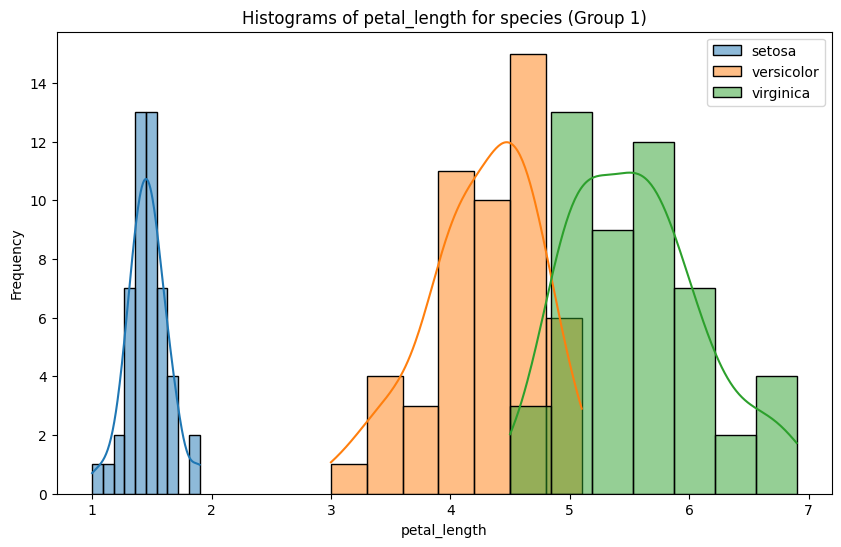

['species']

In [151]:
plot_features_cat_regression(iris, "petal_length", ["petal_width", "species"], 0.4)

In [152]:
plot_features_cat_regression(brujas, "city", pvalue=0.2, with_individual_plot=True)

Error: El parametro target  city  no es una columna numérica continua del dataframe.


In [153]:
plot_features_cat_regression(drogas, "Cholesterol", ["Age", "Sex"], 1)

Error: El parametro target  Cholesterol  no es una columna numérica continua del dataframe.


In [154]:
plot_features_cat_regression(consumo_alcohol, "", ["beer_servings", "spirit_servings", "wine_servings"],  0.4)

Error: El parámetro target    no es una columna del Dataframe.


In [155]:
plot_features_cat_regression(pelis, "Gross", ["Cast1", "Cast2", "Cast3", "Cast4"], with_individual_plot=True)
# Gross no es numérica coninua?

Error: El parametro target  Gross  no es una columna numérica continua del dataframe.


C:\Users\marce\AppData\Local\Temp\ipykernel_31024\2053638316.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_columns[target_col] = df[target_col]


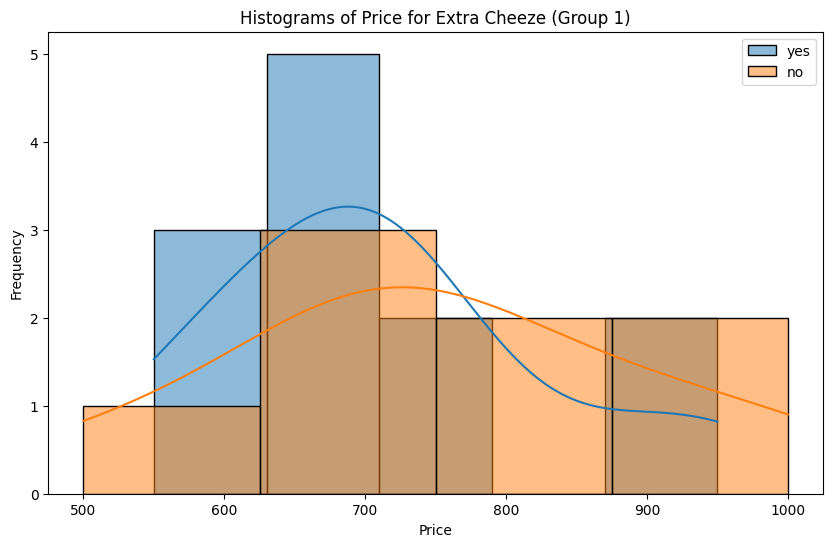

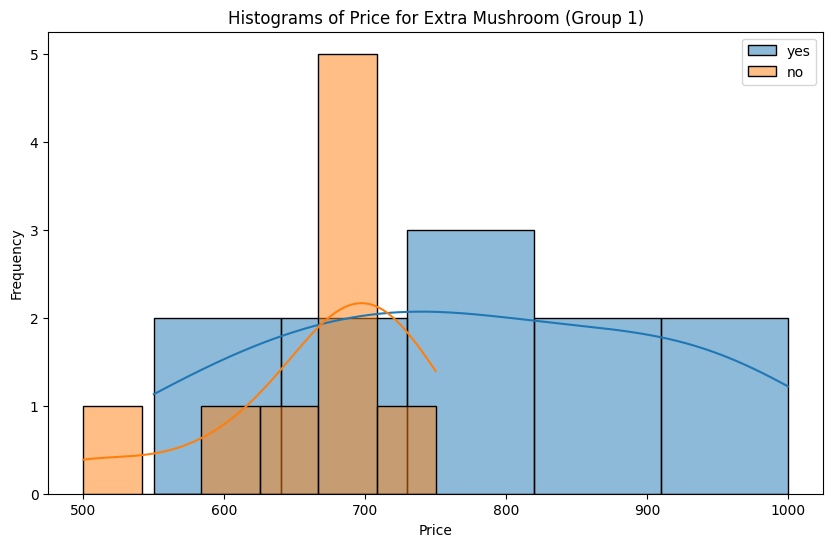

['Extra Cheeze', 'Extra Mushroom']

In [159]:
plot_features_cat_regression(precio_pizza, "Price", ["Restaurant", "Extra Cheeze", "Extra Mushroom"],pvalue=.9)
# Da error cuando una columna de la lista ni es numérica

In [161]:
plot_features_cat_regression(personalidad, "conscientiousness", ["age",	"openness",	"neuroticism"], with_individual_plot=True)
# No reconoce la columna como numérica continua??

Error: El parametro target  conscientiousness  no es una columna numérica continua del dataframe.


In [166]:
personalidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             315 non-null    object
 1   age                315 non-null    int64 
 2   openness           315 non-null    int64 
 3   neuroticism        315 non-null    int64 
 4   conscientiousness  315 non-null    int64 
 5   agreeableness      315 non-null    int64 
 6   extraversion       315 non-null    int64 
 7   Personality        315 non-null    object
dtypes: int64(6), object(2)
memory usage: 19.8+ KB


In [169]:
plot_features_cat_regression(estrellas, "L", ["A_M"], 0.4, with_individual_plot=True)

C:\Users\marce\AppData\Local\Temp\ipykernel_31024\2053638316.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_columns[target_col] = df[target_col]


[]